In [1]:
import sys

import numpy as np
import pandas as pd
import seaborn as sns
from pandas import DataFrame
import matplotlib.pyplot as plt

sys.path.append('..')
from helper import general
from helper import linear_regression as lr

In [2]:
data = pd.read_csv('ex1data1.txt', names=['population', 'profit'])
print(data.head)

<bound method NDFrame.head of     population    profit
0       6.1101  17.59200
1       5.5277   9.13020
2       8.5186  13.66200
3       7.0032  11.85400
4       5.8598   6.82330
..         ...       ...
92      5.8707   7.20290
93      5.3054   1.98690
94      8.2934   0.14454
95     13.3940   9.05510
96      5.4369   0.61705

[97 rows x 2 columns]>


In [3]:
x = general.get_x(data)
print(x.shape, type(x))

(97, 2) <class 'numpy.ndarray'>


In [4]:
y = general.get_y(data)
print(y.shape, type(y))

(97,) <class 'numpy.ndarray'>


In [5]:
theta = np.zeros(x.shape[1])
cost = lr.cost(theta, x, y)
print(cost)

32.072733877455676


In [6]:
epoch = 500
final_theta, cost_data = lr.batch_gradient_decent(theta, x, y, epoch, alpha=0.01)

print(lr.cost(final_theta, x, y))

4.713809531116866


Text(0, 0.5, 'cost')

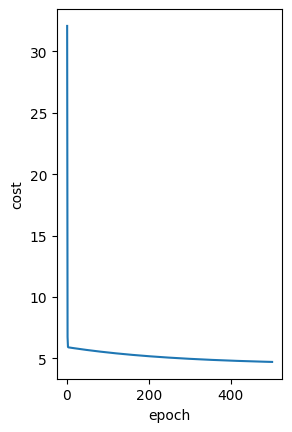

In [7]:
line_plot_data = DataFrame({'x': np.arange(1, len(cost_data) + 1), 'cost': cost_data})

plt.subplot(1, 2, 1)
ax = sns.lineplot(line_plot_data, x='x', y='cost')
ax.set_xlabel('epoch')
ax.set_ylabel('cost')

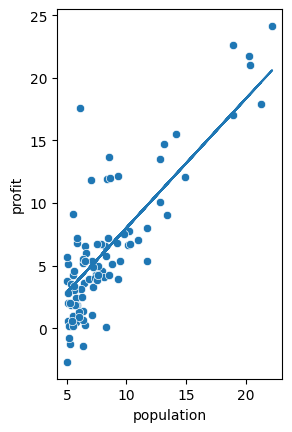

In [8]:
b = final_theta[0]
m = final_theta[1]
plt.subplot(1, 2, 2)
sns.scatterplot(data, x='population', y='profit')
plt.plot(data.population, data.population * m + b)
plt.show()